<a href="https://colab.research.google.com/github/arnisafazla/Neural_Networks_Implementations/blob/main/single_layer_perceptron.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import h5py
import numpy as np
import matplotlib.pyplot as plt
import math
import random
from numpy.random import seed
from numpy.random import randn
from numpy import linspace

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
file = h5py.File("/content/drive/MyDrive/EEE443/hw1/assign1_data1.h5", "r")

In [ ]:
list(file.keys())

['testims', 'testlbls', 'trainims', 'trainlbls']

In [ ]:
trainims = np.array(file['trainims'])
testims = np.array(file['testims'])
trainlbls = np.array(file['trainlbls']) - 1
testlbls = np.array(file['testlbls']) - 1
print(trainims.shape, testims.shape, trainlbls.shape, testlbls.shape)

(5200, 28, 28) (1300, 28, 28) (5200,) (1300,)


In [ ]:
classes = np.unique(testlbls)
no_of_classes = classes.shape[0]
letters = ['A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'J', 'K', 'L', 'M', 'N', 'O', 'P', 'Q', 'R', 'S', 'T', 'U', 'V', 'W', 'X', 'Y', 'Z']

Part 3.a) Print one sample from each class and calculate the correlation coefficients between them.


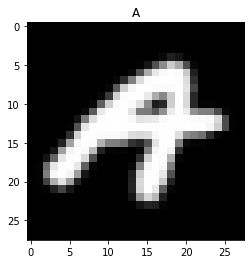

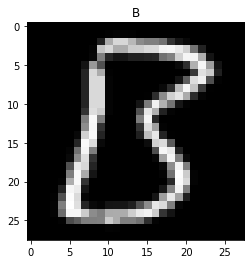

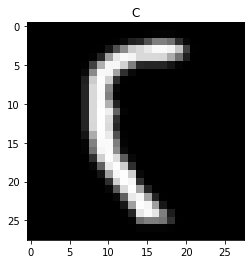

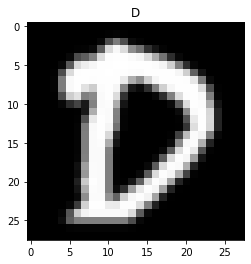

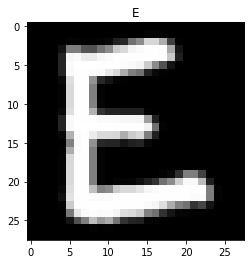

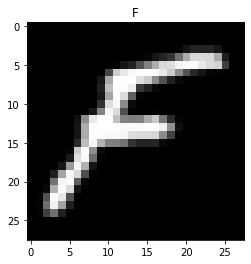

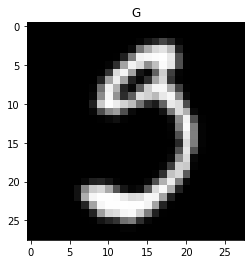

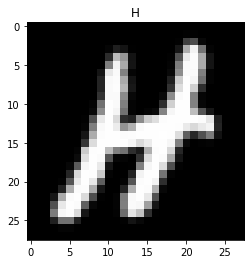

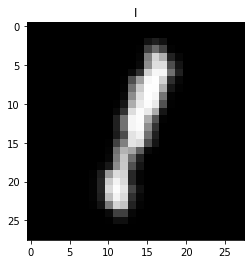

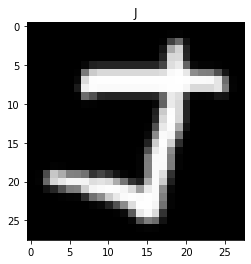

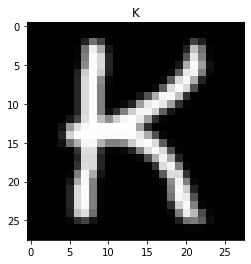

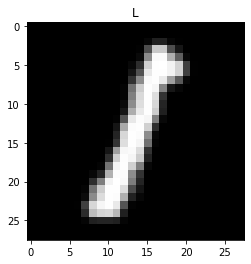

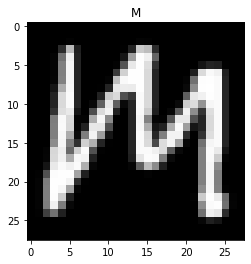

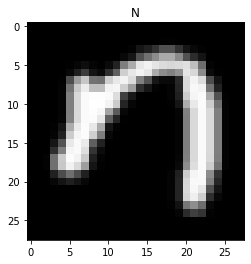

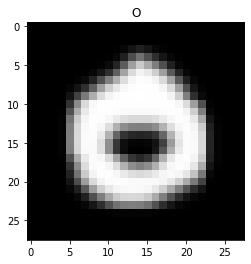

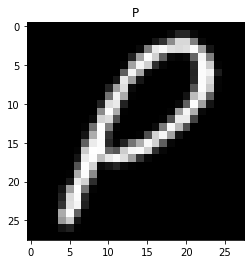

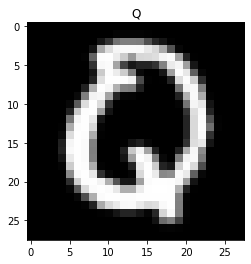

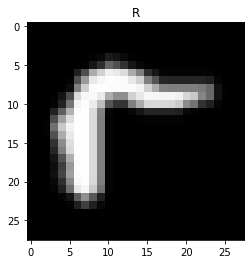

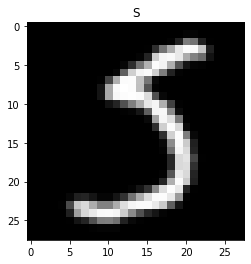

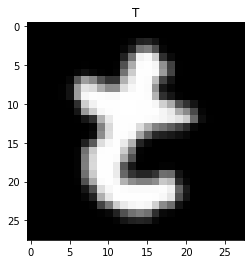

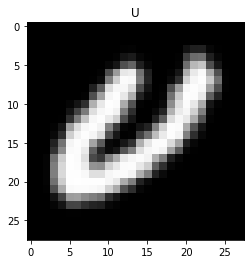

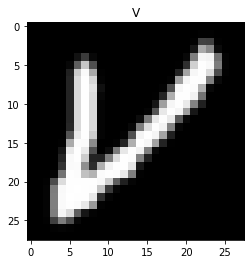

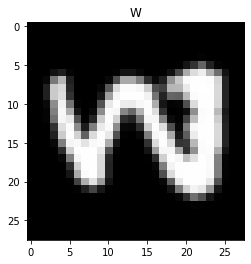

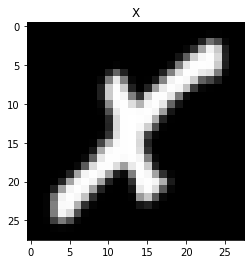

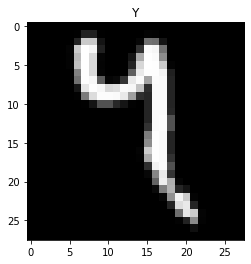

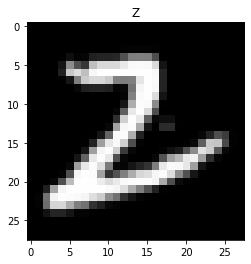

In [ ]:
print("Part 3.a) Print one sample from each class and calculate the correlation coefficients between them.")
samples = []

for i in classes:
  index = np.where(testlbls == i)[0][0]
  samples.append(testims[index])
  plt.imshow(testims[index].T, cmap = 'gray')
  plt.title(letters[int(i)])
  plt.show()

In [ ]:
def MSE_error(y, label):
  # y is output of the network, 26 x 1 vector. label is int between 1 and 26.
  # y 0> probabilities of each class, so I assume it will be between 0 and 1.
  # sigmoid function also makes sure it's between [0,1]
  y_test = np.zeros((26))
  y_test[int(label)] = 1
  return np.sum((y_test - y) ** 2) / 2

In [ ]:
def MSE_derivative(y, label):
  y_test = np.zeros((26))
  y_test[int(label)] = 1.0
  return y_test - y

In [ ]:
def predict(W, b, X): # shape[0] = no of samples, shape[1] = rows of the image, shape[2] = cols of the img
  X = X.reshape((X.shape[0], -1))
  v = np.matmul(X, W.T)
  return sigmoid(v)

In [ ]:
def sigmoid(v):
  v = np.clip( v, -500, 500 )
  return 1/(1 + np.exp(-v))

In [ ]:
def sigmoid_derivative(v):
  return sigmoid(v) * (1 - sigmoid(v))

In [ ]:
def train(X_train, Y_train, learning_rate, iterations):
  X_train = X_train.reshape((X_train.shape[0], -1))
  sample_size = X_train.shape[1]
  n = X_train.shape[0]    # no of samples
  # W_hist, b_hist and MSE_hist are for saving the progress.
  W_hist = []
  b_hist = []
  MSE_hist = []
  # now initialize W and b from a Gaussian distribution N(0, 0.01) (with std 0.1)
  W = np.random.normal(0, 0.1, no_of_classes * sample_size).reshape((no_of_classes, sample_size))
  b = np.random.normal(0, 0.1, no_of_classes)

  for i in range(iterations):
    W = W/np.linalg.norm(W)
    # choose random sample from X_train
    index = random.randint(0, n-1) 
    X = X_train[index]

    v = np.array([(np.dot(X, W[i])) for i in range(W.shape[0])]) - b
    y = sigmoid(v)
    MSE = MSE_error(y, Y_train[index])
    # update W using the gradient
    delta_error = MSE_derivative(y, Y_train[index]) * sigmoid_derivative(v)
    W_gradient = np.array([X * val for val in delta_error]) * -1
    W = W - learning_rate * W_gradient
    # update b using the gradient
    b = b - learning_rate * delta_error

    W_hist.append(W)
    b_hist.append(b)
    MSE_hist.append(MSE)
  return W_hist, b_hist, MSE_hist

In [ ]:
learning_rates = [10, 100, 1000]
print("Part 3.c: train with different learning rates which are", learning_rates, ". Plot their MSE histories.")
W_final_list = []
b_final_list = []
MSE_hist_list = []

for learning_rate in learning_rates:
  print("Training with learning rate = ", learning_rate)
  W_hist, b_hist, MSE_hist = train(trainims, trainlbls, learning_rate, 10000)
  W_final_list.append(W_hist[-1])
  b_final_list.append(b_hist[-1])
  MSE_hist_list.append(MSE_hist)

Part 3.c: train with different learning rates which are [10, 100, 1000] . Plot their MSE histories.
Training with learning rate =  10
Training with learning rate =  100
Training with learning rate =  1000


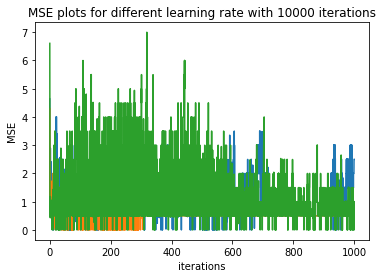

In [ ]:
x = linspace(0, 1000, 10000)
# ax = plt.subplot(111)
for i in range(len(learning_rates)):
  plt.plot(x, MSE_hist_list[i], label = str(learning_rates[i]))

plt.xlabel("iterations")
plt.ylabel("MSE")
plt.title("MSE plots for different learning rates with 10000 iterations")
# ax.legend()
plt.show()

In [ ]:
print("Part 3.d: Validate the performances. Report the performance values")
n = testlbls.shape[0]

for i in range(len(learning_rates)):
  W = W_final_list[i]
  b = b_final_list[i]
  W = np.array([W[i]/(np.sum(W[i]) * 1000) for i in range(W.shape[0])])
  pred = predict(W, b, testims)
  y = np.array([np.where(pred[row] == np.max(pred[row]))[0][0] for row in range(pred.shape[0])])
  error = np.array([y[sample] != testlbls[sample] for sample in range(n)])
  false_count = np.count_nonzero(error)
  print("No. of errors with learning rate = ", learning_rates[i], ": ", false_count, "out of ", n, " samples")

Part 3.d: Validate the performances. Report the performance values
No. of errors with learning rate =  0.1 :  1207 out of  1300  samples
No. of errors with learning rate =  1 :  1226 out of  1300  samples
No. of errors with learning rate =  10 :  1051 out of  1300  samples


Part 3.b) Print the network weights
All their accuracies are below 5 percent. When I try to plot the weights, I see that only the one with learning rate = 10 could capture the letters correctly. Others all learned wrong letters.


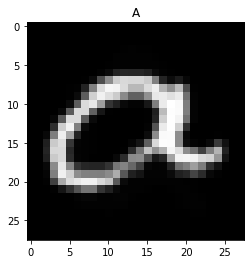

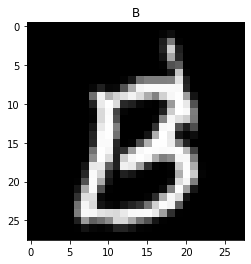

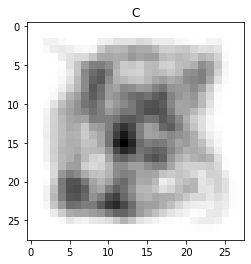

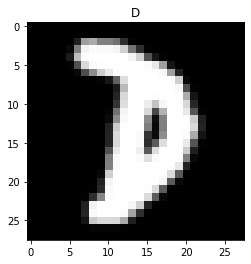

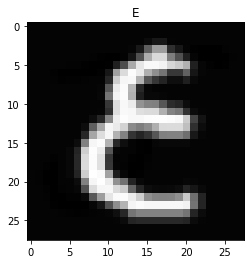

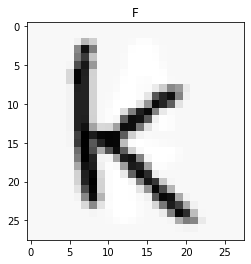

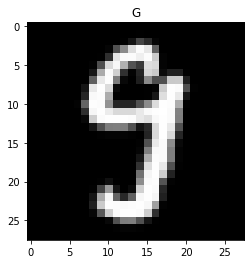

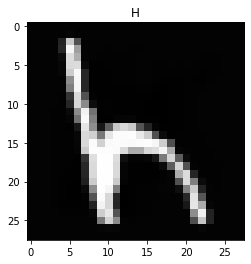

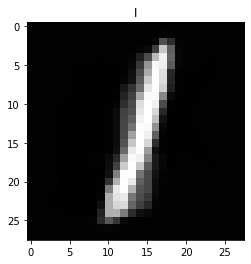

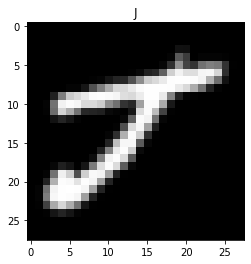

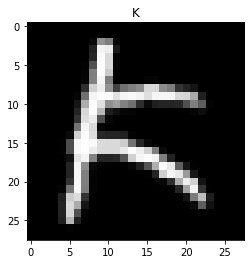

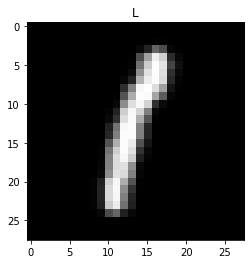

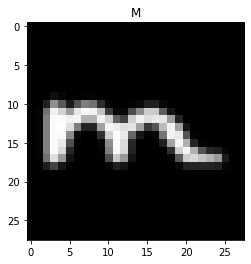

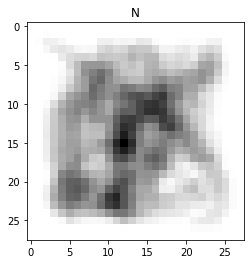

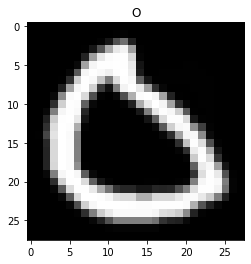

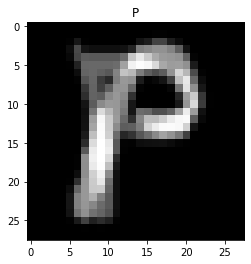

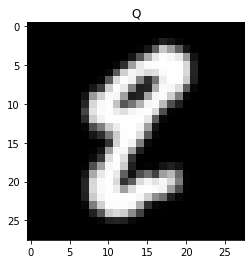

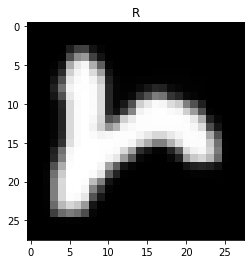

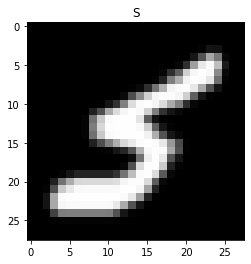

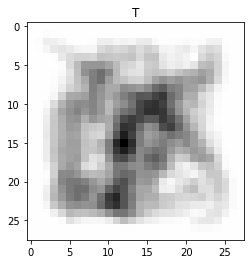

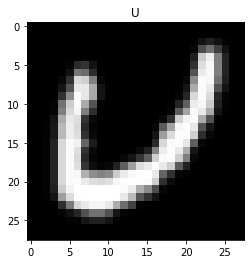

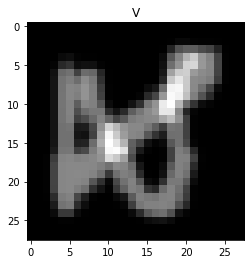

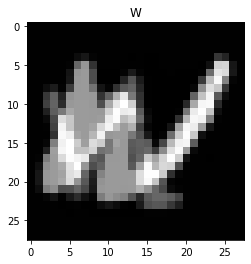

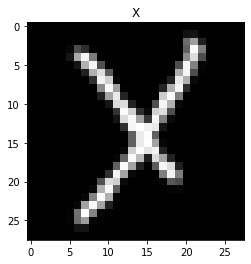

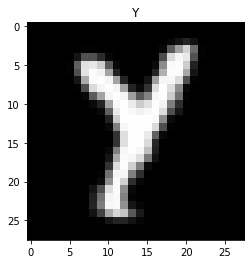

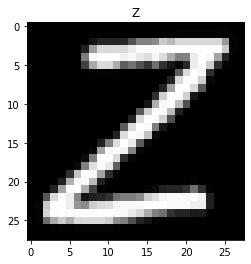

In [ ]:
print("Part 3.b) Print the network weights")
print("All their accuracies are below 5 percent. When I try to plot the weights, I see that only the one with learning rate = 10 could capture the letters correctly. Others all learned wrong letters.")
W = W_final_list[2]
for i in range(W.shape[0]):
  plt.imshow(W[i].reshape((28, 28)).T, cmap = 'gray')
  plt.title(letters[i])
  plt.show()